In [1]:
import matplotlib.pyplot as plt
import nmrglue
import numpy as np
import os
import sys

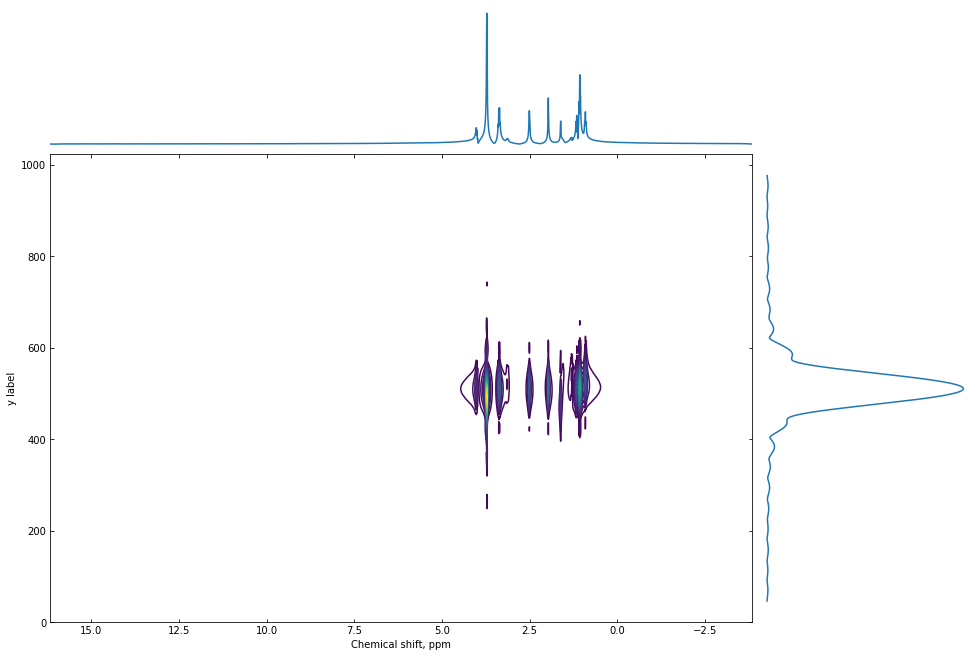

In [2]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


countour = [left, bottom, width, height]
spectrum_x = [left, bottom + height + spacing, width, 0.2]
spectrum_y = [left + width + spacing, bottom, 0.2, height]

plt.figure(figsize = (15,10))

countour = plt.axes(countour)
countour.tick_params(direction='in', top=True, right=True)
spectrum_x = plt.axes(spectrum_x)
spectrum_x.tick_params(direction='in', labelbottom=False)
spectrum_y = plt.axes(spectrum_y)
spectrum_y.tick_params(direction='in', labelleft=False)


path = os.path.abspath(sys.argv[1] if len(sys.argv) == 2 else os.getcwd())
params, pdata = nmrglue.fileio.bruker.read_pdata(dir=os.path.join(path, 'pdata', '1'))

shape = pdata.shape
O1P = params['acqus']['O1']/params['acqus']['SFO1']
SW = params['acqus']['SW']

X, Y = np.meshgrid(np.linspace(O1P+SW/2, O1P-SW/2, shape[1]), np.arange(shape[0]))

countour.contour(X, Y, pdata, levels=50)
countour.set_xlabel('Chemical shift, ppm')
countour.set_xlim(O1P+SW/2, O1P-SW/2)
countour.set_ylabel('y label')

spectrum_x.plot(np.linspace(O1P+SW/2, O1P-SW/2, shape[1]), pdata.sum(axis=0))
spectrum_x.set_xlim(O1P+SW/2, O1P-SW/2)
spectrum_x.axis('off')

spectrum_y.plot(pdata.sum(axis=1), np.arange(shape[0]))
spectrum_y.axis('off')

plt.show()